# Importing Necessary Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Reading CSV File as pd df

In [54]:
df = pd.read_csv('salaries_cyber.csv')

# Displaying df
The csv file used for the analysis contains 11 Columns and 1247 Rows.

In [55]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
...,...,...,...,...,...,...,...,...,...,...,...
1242,2020,MI,FT,Cyber Security Analyst,140000,AUD,96422,AU,50,AU,M
1243,2021,SE,FT,Information Security Manager,60000,GBP,82528,GB,50,GB,L
1244,2021,SE,FT,Penetration Testing Engineer,126000,USD,126000,US,100,US,L
1245,2021,MI,FT,Information Security Analyst,42000,GBP,57769,GB,100,GB,L


# Displaying df's info
df.info() function returns the basic information of the DataFrame including its columns, non-null count, DataType for each column, memory usage, and others.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


# Data Descriptive Statistic
df.describe() function returns the descriptive statsistics (count, mean, std, min, max, and so on) of the columns of the DataFrame.

In [57]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


# Displaying unique value counts for each column
df.nunique() returns the count of unique values corresponding to each column.

In [58]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              87
salary                384
salary_currency        21
salary_in_usd         579
employee_residence     58
remote_ratio            3
company_location       55
company_size            3
dtype: int64

# Columns on which we will be working
df.columns returns the columns present in the DataFrame

In [59]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Max and Min Job Title in every Year
The main aim is to find the Job Title whose employee were max and min every Year.

In [60]:
grp_Wy=df.groupby('work_year')
print('Max Job Title in every year',grp_Wy['job_title'].max())
print('\nMin Job Title in every year',grp_Wy['job_title'].min())

Max Job Title in every year work_year
2020             Vulnerability Researcher
2021    Vulnerability Management Engineer
2022             Vulnerability Researcher
Name: job_title, dtype: object

Min Job Title in every year work_year
2020    Application Security Engineer
2021    Application Security Engineer
2022     Application Security Analyst
Name: job_title, dtype: object


This analysis has helped us to know the most popular and the least popular Job Title in the Cyber Security domain every year.

# Average Salary and Remote Ratio of different Experience levels in each Year
The main ain is to find the average salary and remove ratio yearwise for each experience level.

In [61]:
pd.pivot_table(df,index=['work_year','experience_level'],aggfunc='mean')

/tmp/ipykernel_2992/2088990623.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



remote_ratio        salary  salary_in_usd
work_year experience_level                                           
2020      EN                   53.225806  1.363616e+05   57538.193548
          EX                   50.000000  2.335130e+05  238966.857143
          MI                   53.623188  1.212405e+05   99386.637681
          SE                   74.675325  1.407476e+05  126701.103896
2021      EN                   61.607143  1.047068e+05   64864.633929
          EX                   80.357143  3.291071e+05  190844.357143
          MI                   66.666667  2.245488e+05   91925.771930
          SE                   73.410405  1.561298e+05  129844.612717
2022      EN                   73.611111  7.299861e+04   64181.444444
          EX                   86.842105  2.127895e+05  200924.578947
          MI                   67.151163  1.304377e+05  116362.627907
          SE                   81.818182  1.859227e+06  157762.114478

The use of pivot table has helped us to do more than one grouping efficiently. The above Pivot Table can easily explain the average salary and remote ratio for each experience level yearwise.

# Creating Word Cloud for most used words
Word Cloud is one of the most efficient ways to find the most popular keywords used in the dataset.

In [62]:
text_variable = " ".join(title for title in df.job_title)

word_cloud1 = WordCloud(collocations = False, background_color='white').generate(text_variable)
word_cloud1.to_file('word_cloud.png')

Displaying Word Cloud

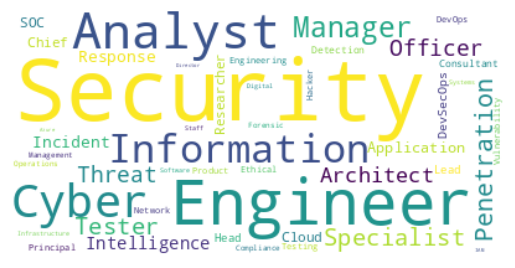

In [63]:
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

The above Word Cloud is explaining that the most popular keywords in the Cyber Security Salary Dataset are Security, Engineer, Analysi, Cyber, Information, and so on.

# Median Salary Analysis WorldWide
Geo Analysis helps in analysing any data worldwide. Thus, the following World Map is providing the details of Median Salary for every country.

In [92]:
import country_converter as cc
import plotly.express as px
df['company_location'] = cc.convert(names=df['company_location'], to="ISO3")

grouped = df[['company_location', 'salary_in_usd']].groupby('company_location').median().reset_index()

fig = px.choropleth(locations=grouped['company_location'], color=grouped['salary_in_usd'], color_continuous_scale=px.colors.sequential.Peach)
fig.show()

.

.

.

.

.

.

.

.

.

.

.

.

.

.

The data of Greyed Out Countries are not available. For rest of the countries, darker the color, higher the median salary.

# Experience v/s Salary Bar Plot
Visualization along with Analysis helps our mind to easily understand the stastistic. Thus, all queries from now are also visualized.

The following query explains the salary of employees according to their experience level.

In [65]:
df.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False)

experience_level
SE    79074451
MI    42591357
EX    14651544
EN    13669587
Name: salary_in_usd, dtype: int64

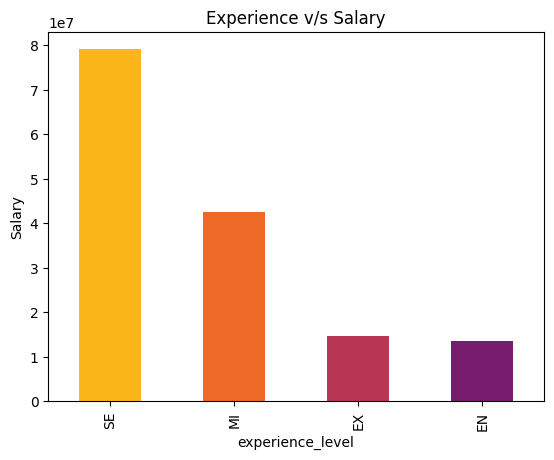

In [66]:
plt.title('Experience v/s Salary')
plt.xlabel('Experience  Level')
plt.ylabel('Salary')
df.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 5))
plt.show()

The above Bar Plot depicts that SE experience level earns the most while EN experience level earns the least.

# Employment Type v/s Salary Bar & Line Plot
It is important to know the Salary difference of Full Time, Part Time, and other Employment Type workers in the CyberSecurity domain.

In [67]:
df.groupby('employment_type')['salary_in_usd'].sum().sort_values(ascending=False)

employment_type
FT    148180589
CT      1145631
PT       408886
FL       251833
Name: salary_in_usd, dtype: int64

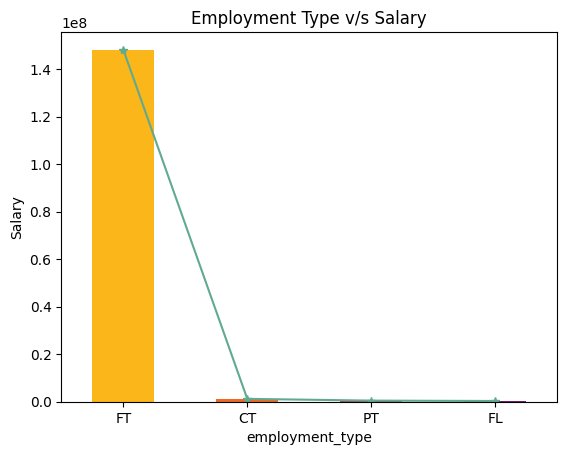

In [68]:
plt.title('Employment Type v/s Salary')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
df.groupby('employment_type')['salary_in_usd'].sum().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 5))
df.groupby('employment_type')['salary_in_usd'].sum().sort_values(ascending=False).plot(kind='line', marker='*', color=sns.color_palette("crest", 3))
plt.show()

Full Time employees (FT) earns the most while the remaining job type employees earns too little in compare to FT.

# Company Size v/s Salary Line Plot
One of the most important factors affecting Salary is Company Size. The following analysis and visualization will show the real comparision in the industry.

In [69]:
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending=False)

company_size
L    93645628
M    48889816
S     7451495
Name: salary_in_usd, dtype: int64

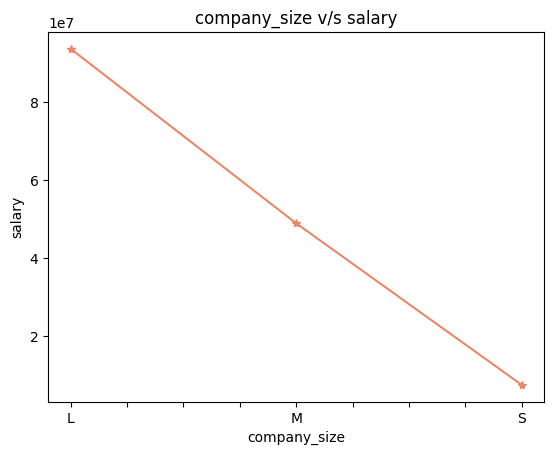

In [70]:
plt.title('company_size v/s salary')
plt.ylabel('salary')
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending=False).plot(kind='line', marker='*', color=sns.color_palette('flare', 5))
plt.show()

The above Line Plot shows that there is no comparision in the Salary given by Large Companies with that of Small Companies.

# No of Employees for Each Employee Type
Some people prefer Full Time, while some prefer Part Time. So, this analysis brings out the statistical data for the same.

In [71]:
df['employment_type'].value_counts()

FT    1225
CT      11
PT       8
FL       3
Name: employment_type, dtype: int64

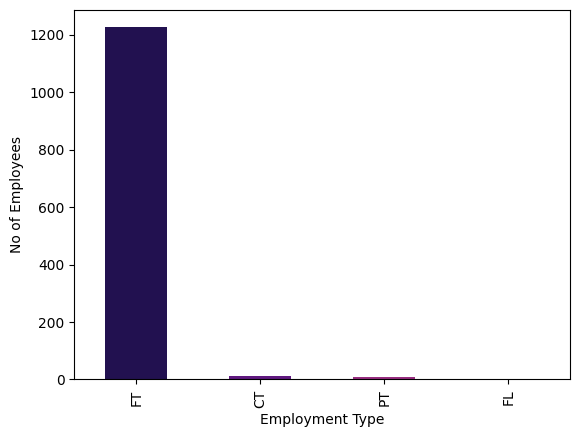

In [72]:
df['employment_type'].value_counts().plot(kind='bar',color=sns.color_palette("magma"))
plt.xlabel("Employment Type")
plt.ylabel("No of Employees")
plt.show()

The above Analysis and Visualization tells that most of the CyberSecurity domain employees works Full Time.

# No of Employees for Each Experience Level
Different Experience levels have different numbers of employees. For example, the total number of Assistant Professors will differ from that of Associate Professors.

In [73]:
df['experience_level'].value_counts()

SE    547
MI    412
EN    215
EX     73
Name: experience_level, dtype: int64

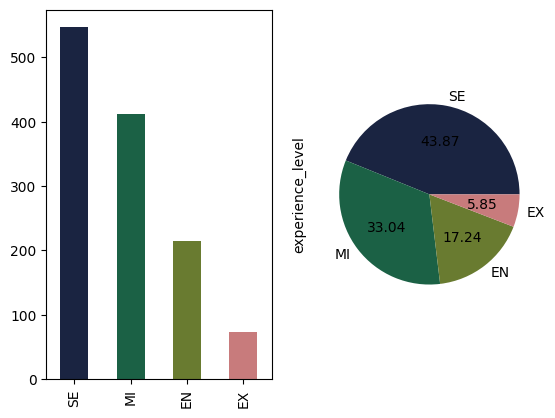

In [74]:
plt.subplot(1,2,1)
df['experience_level'].value_counts().plot(kind='bar',color=sns.color_palette("cubehelix"))
plt.subplot(1,2,2)
df['experience_level'].value_counts().plot(kind='pie',colors=sns.color_palette("cubehelix"), autopct="%.2f")
plt.show()

Outcome: 43.87% (max) Employees are of SE experience level.

# Remote Ratio Comparision
Some employees prefer work from office while some prefer work from home. But, there are some employees who also visit office occasionaly, thus maintaining 50-50 office and remote work ratio.

In [75]:
df['remote_ratio'].value_counts()

100    769
50     245
0      233
Name: remote_ratio, dtype: int64

<AxesSubplot: ylabel='remote_ratio'>

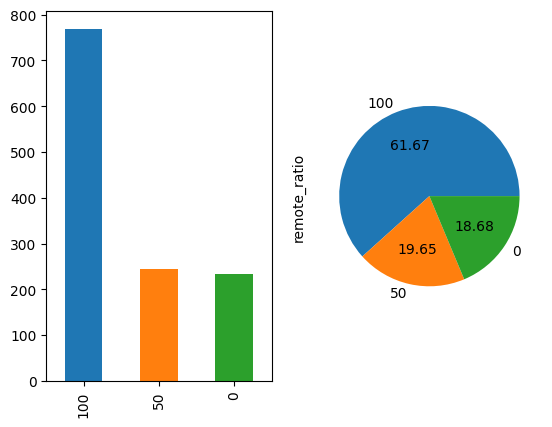

In [76]:
plt.subplot(1,2,1)
df['remote_ratio'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.subplot(1,2,2)
df['remote_ratio'].value_counts().plot(kind='pie',colors=sns.color_palette('tab10'),autopct="%.2f")

Most Employees work from office while the least Employees work remotely.

# Employees with Different Salary Currency
Since the dataset covers global data, the Salary Currency of Employees will differ.

In [77]:
df['salary_currency'].value_counts()

USD    934
EUR    127
GBP     56
CAD     39
INR     23
AUD     18
BRL     12
CHF      9
NZD      5
PLN      4
DKK      4
ZAR      3
SEK      3
ILS      2
SGD      2
NOK      1
IDR      1
MXN      1
HUF      1
TWD      1
RUB      1
Name: salary_currency, dtype: int64

<AxesSubplot: >

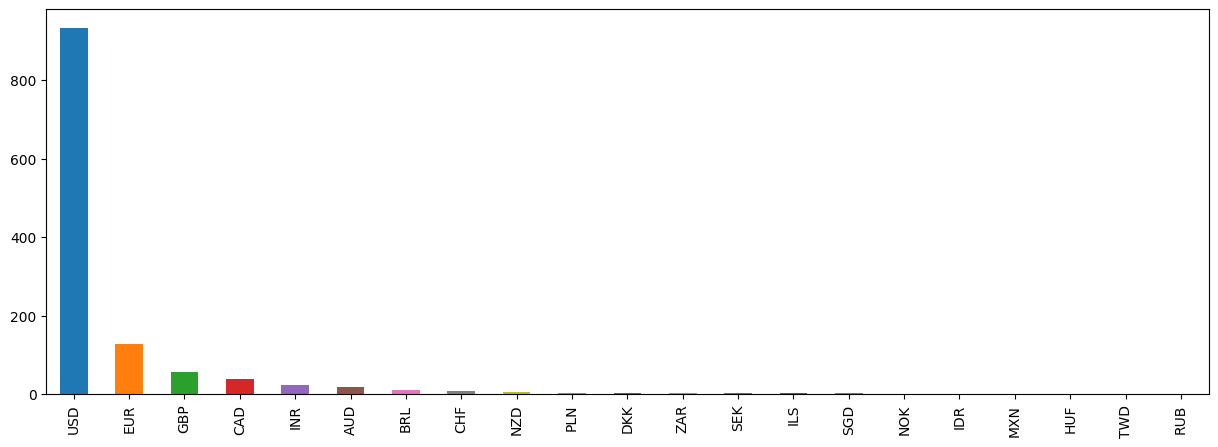

In [78]:
plt.figure(figsize=(15,5))
df['salary_currency'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

Most Employees earns in USD.

# Employee Count on different Company Location
The number of Employees in every Country will differ according to the Company Location. This analysis is to find the Employee Count in each Country.

In [79]:
df['company_location'].value_counts()

USA    882
GBR     57
CAN     51
DEU     33
IND     23
AUS     21
FRA     19
CHE     14
NLD     13
BRA     12
ESP     11
ITA      8
PRT      8
DNK      6
POL      5
GRC      5
NZL      5
IRL      5
ROU      4
RUS      4
SVN      4
SWE      4
SGP      4
BEL      3
ARG      3
ZAF      3
NOR      3
ISR      3
AUT      2
EST      2
AFG      2
HUN      2
JPN      2
ARE      2
DZA      2
PAK      1
BWA      1
SAU      1
VNM      1
TWN      1
EGY      1
LUX      1
UMI      1
CHL      1
AZE      1
MEX      1
SRB      1
KEN      1
ATA      1
IDN      1
CZE      1
ALA      1
HRV      1
ETH      1
TUR      1
Name: company_location, dtype: int64

<AxesSubplot: >

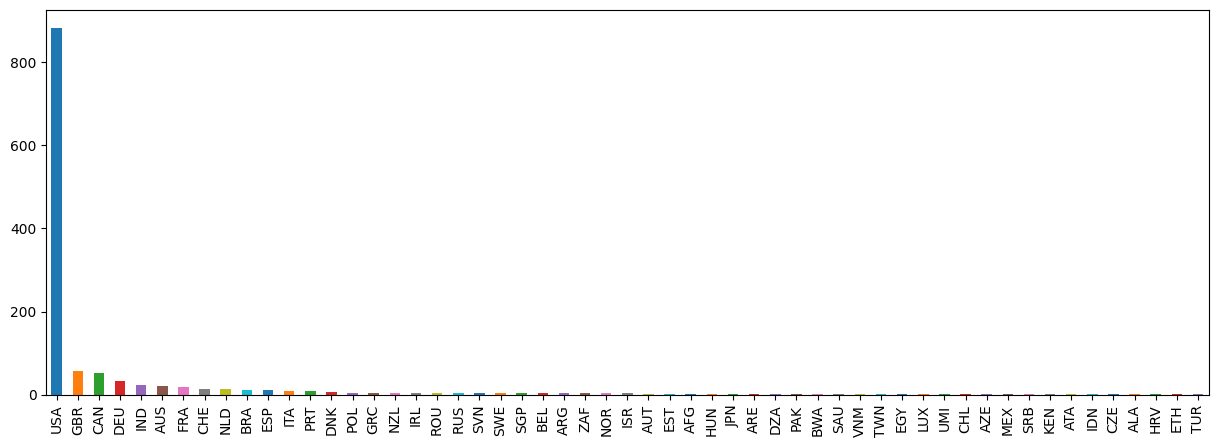

In [80]:
plt.figure(figsize=(15,5))
df['company_location'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

Most CyberSecurity employees are in USA.

# No of Employess for each Job Title
This analysis will help in finding the most and the least popular Job Title in the CyberSecurity domain.

In [81]:
df['job_title'].value_counts()

Security Engineer                          194
Cyber Security Analyst                     133
Penetration Tester                          70
Information Security Manager                64
Cyber Security Engineer                     63
                                          ... 
Principal Application Security Engineer      1
Application Security Specialist              1
Information Security Compliance Analyst      1
Application Security Architect               1
Concierge Security Engineer                  1
Name: job_title, Length: 87, dtype: int64

<AxesSubplot: >

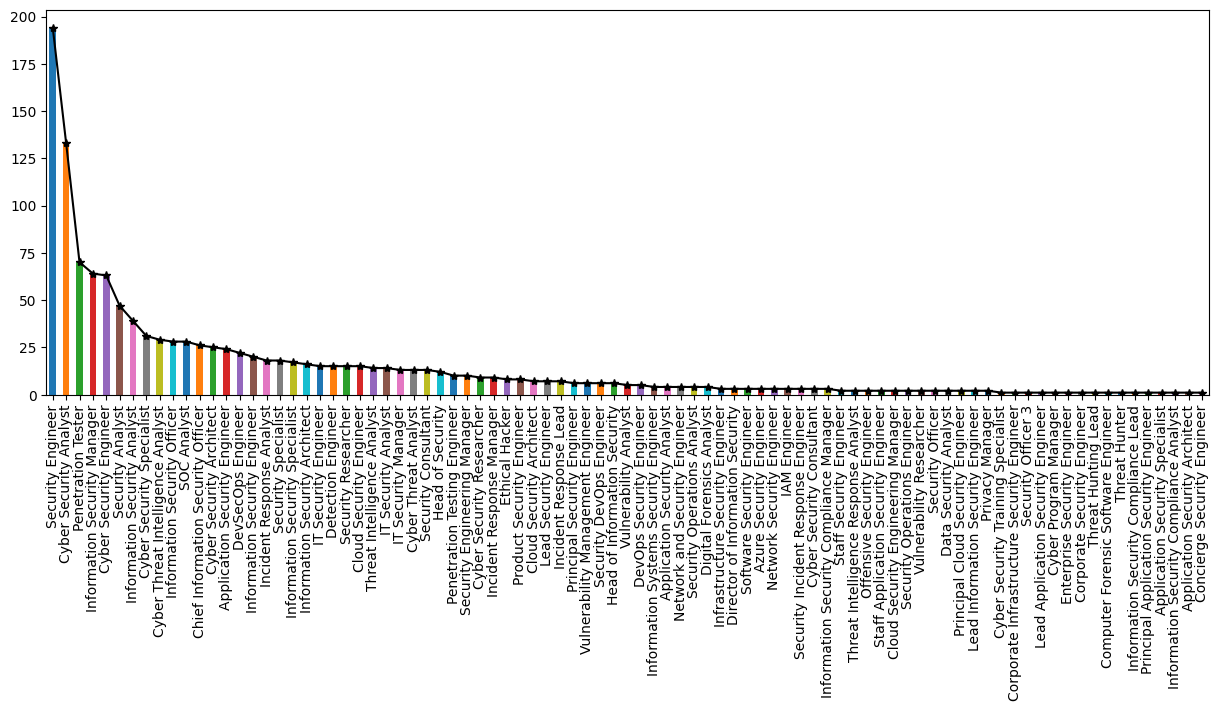

In [82]:
plt.figure(figsize=(15,5))
df['job_title'].value_counts().plot(kind='line',color='black',marker="*")
df['job_title'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))

Most CyberSecurity domain Employees are Security Engineer.

# Salary v/s Experience Level for each Year
The Salary of employees also vary according to their Experience level.

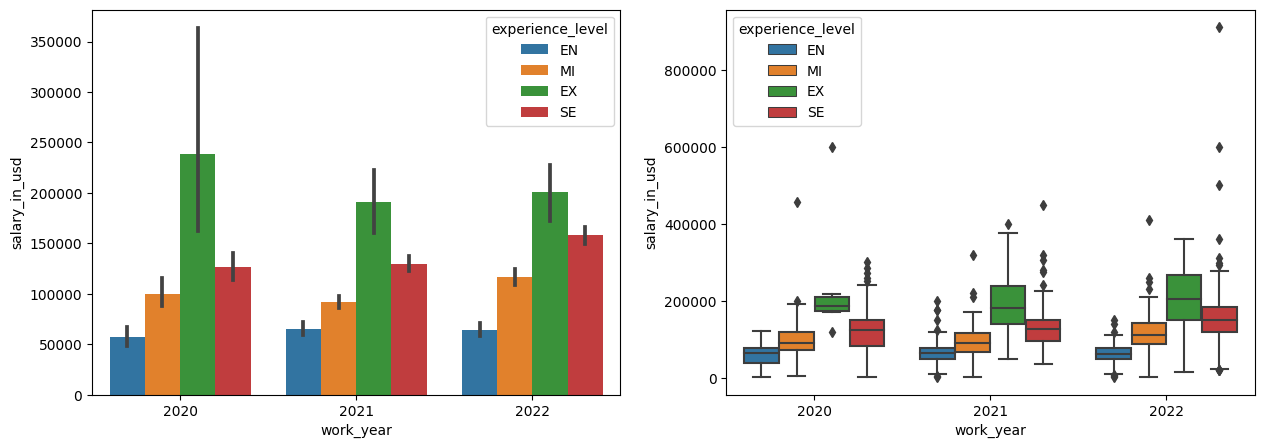

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['experience_level'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['experience_level'])
plt.show()
plt.show()

Box Plot has helped in analysing those employees (outliers) who earn more or less than the average of their Experience Level each year.

# Salary v/s Employee Type for each Year
It is important to know whether the Salary varies if an employee is working Full Time, Part Time, or other Employment Type.

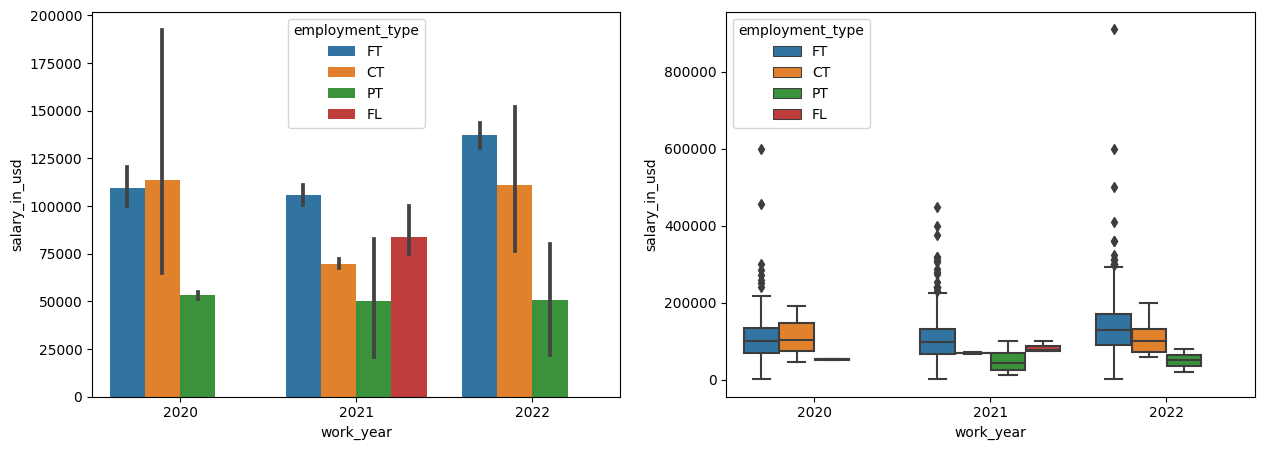

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['employment_type'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['employment_type'])
plt.show()

The Salary on the basis of Employment type is varying every year. Thus, the Salary doesn't depend on Employment Type in CyberSecurity domain.

# Salary v/s Remote Ratio for each Year
Does Salary vary if an employee is working remotely or he/she gets the same salary as employee working from office?

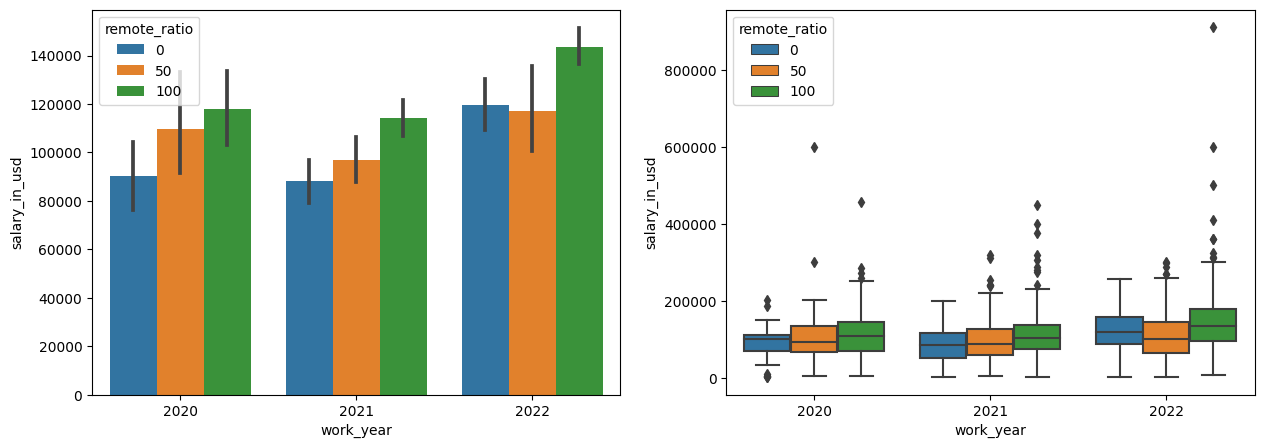

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['remote_ratio'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['remote_ratio'])
plt.show()

Employees working from office earns the most while Remote workers earns the least.

# Salary v/s Company Size for each Year
We have already discussed that Large companies pay more than Small and Medium sized company. But, is it true for every year?

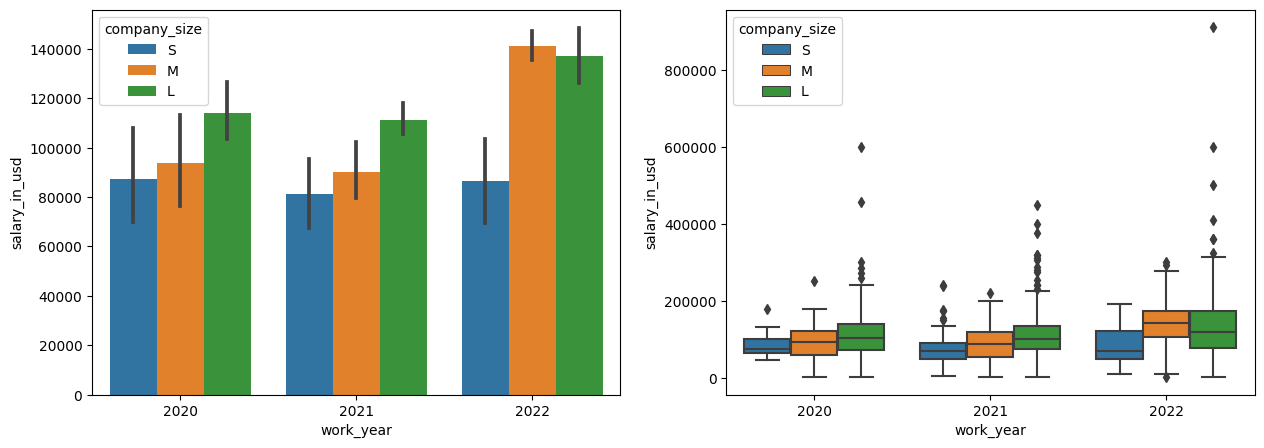

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['company_size'])
plt.subplot(1,2,2)
sns.boxplot(x=df['work_year'],y=df['salary_in_usd'],hue=df['company_size'])
plt.show()

Medium size companies has paid more to their employees in 2022 than Large and Small sized companies. Thus, the trend of giving more salaries by Large companies is broken in 2022.

Even though, the maximum package offered every year is by Large size company and it is relatively higher in 2022. (Box Plot)

# Salary (USD) Growth Analysis
The trend of salary growth every year.

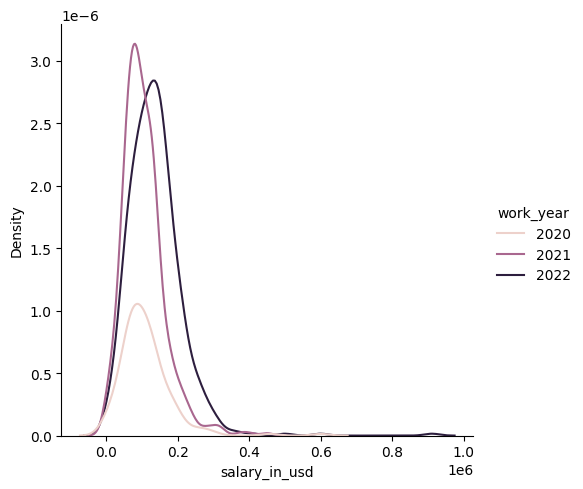

In [87]:
sns.displot(data=df,x='salary_in_usd', hue='work_year', kind='kde')

Salary for employees have increased every year.

# Salary Trend a/c Company Size
Growth of Salary w.r.t. their company size.

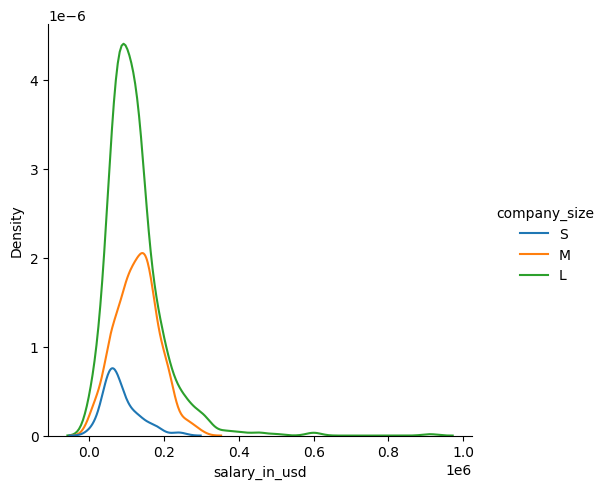

In [88]:
sns.displot(data=df, x='salary_in_usd', hue='company_size', kind='kde')

The average salary offered to the most employees of Large size companies is almost similar to the maximum offered salary to a few employees of Small size companies.

# Salary v/s Experience Level Comparision
Salary also differs with Experience level. The following displot depicts the same.

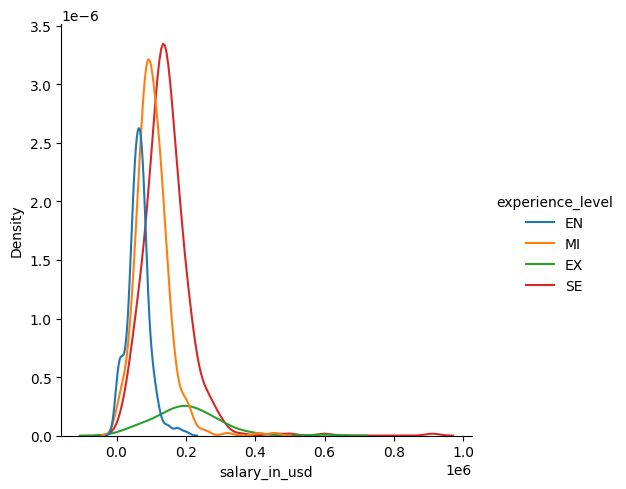

In [89]:
sns.displot(data=df, x='salary_in_usd', hue='experience_level', kind='kde')

The average salary earned by most employees of SE experience is almost similar to the maximum salary earned by least employees of EN experience level.

# Analysis of Entire Dataset through Pair Plot
The following Plot provides complete analysis of the Dataset.

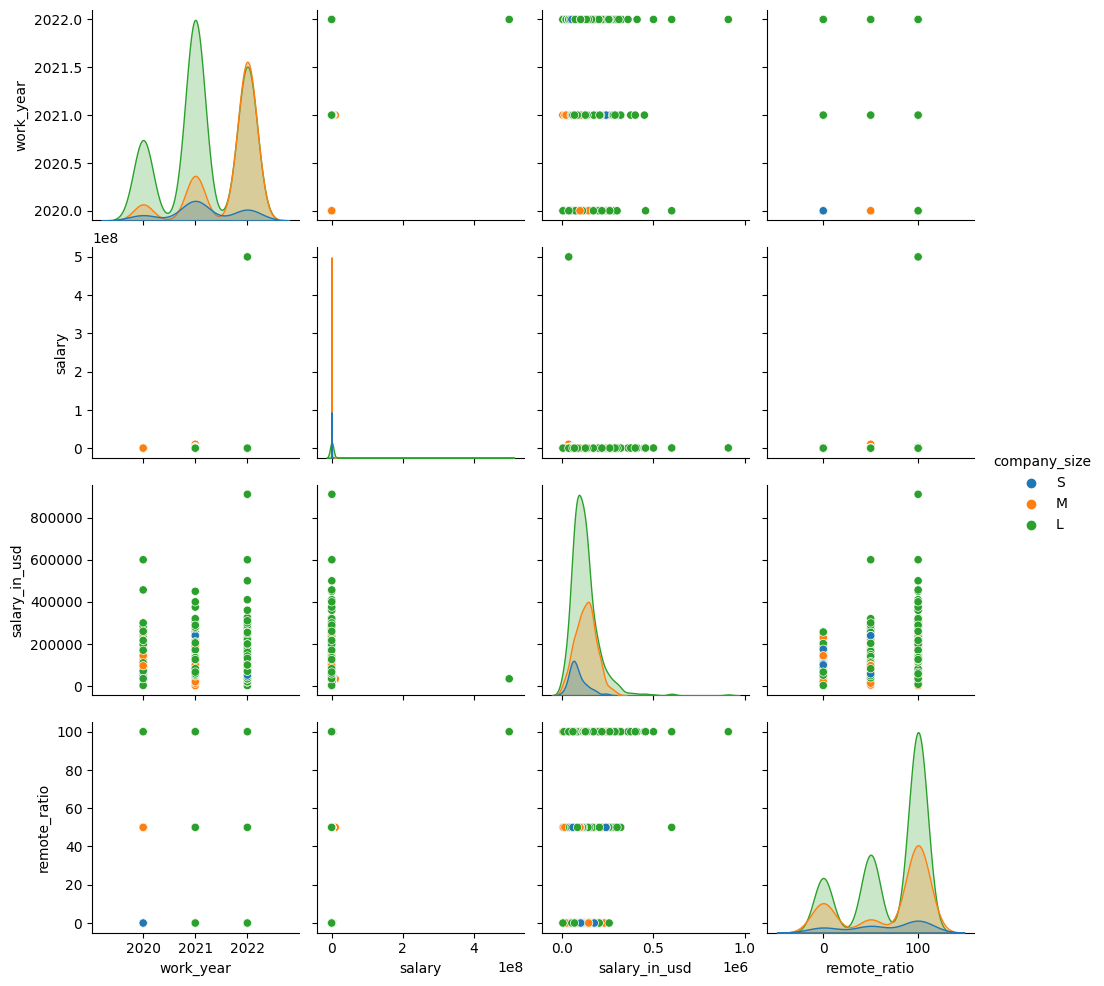

In [90]:
sns.pairplot(df,hue='company_size')